In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

df = pd.read_csv('../data/final_per_90_and_pAdj.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'fb_id', 'player_name', 'Squad_from_op',
       'Opposing_Poss', 'Opposing_Touches', 'Nation', 'Position', 'Nineties',
       'xA', 'Key_pass', 'Comp_prog', 'Total_Cmp', 'Total_Att',
       'Total_Cmp_pct', 'Total_Tot_Dist', 'Total_Prg_Dist', 'Short_Cmp',
       'Short_Att', 'Short_Cmp_pct', 'Medium_Cmp', 'Medium_Att',
       'Medium_Cmp_pct', 'Long_Cmp', 'Long_Att', 'Long_Cmp_pct', 'touches',
       'touches_def_box', 'touches_def_3rd', 'touches_mid_3rd',
       'touches_att_3rd', 'touches_att_box', 'touch_live', 'dribble_Succ',
       'dribble_Att', 'dribble_Succ_pct', 'num_dribble_past', 'dribble_megs',
       'carries', 'carries_dist', 'carries_prog_dist', 'carries_prog',
       'carries_att_3rd', 'carries_att_box', 'miss_control', 'dispossed',
       'recep_targ', 'recep_succ', 'recept_pct', 'Fouls_drawn', 'Offsides',
       'Crosses', 'PK_won', 'Aerial_win_pct', 'Pos', 'Gls', 'Sh', 'SoT',
       'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dis

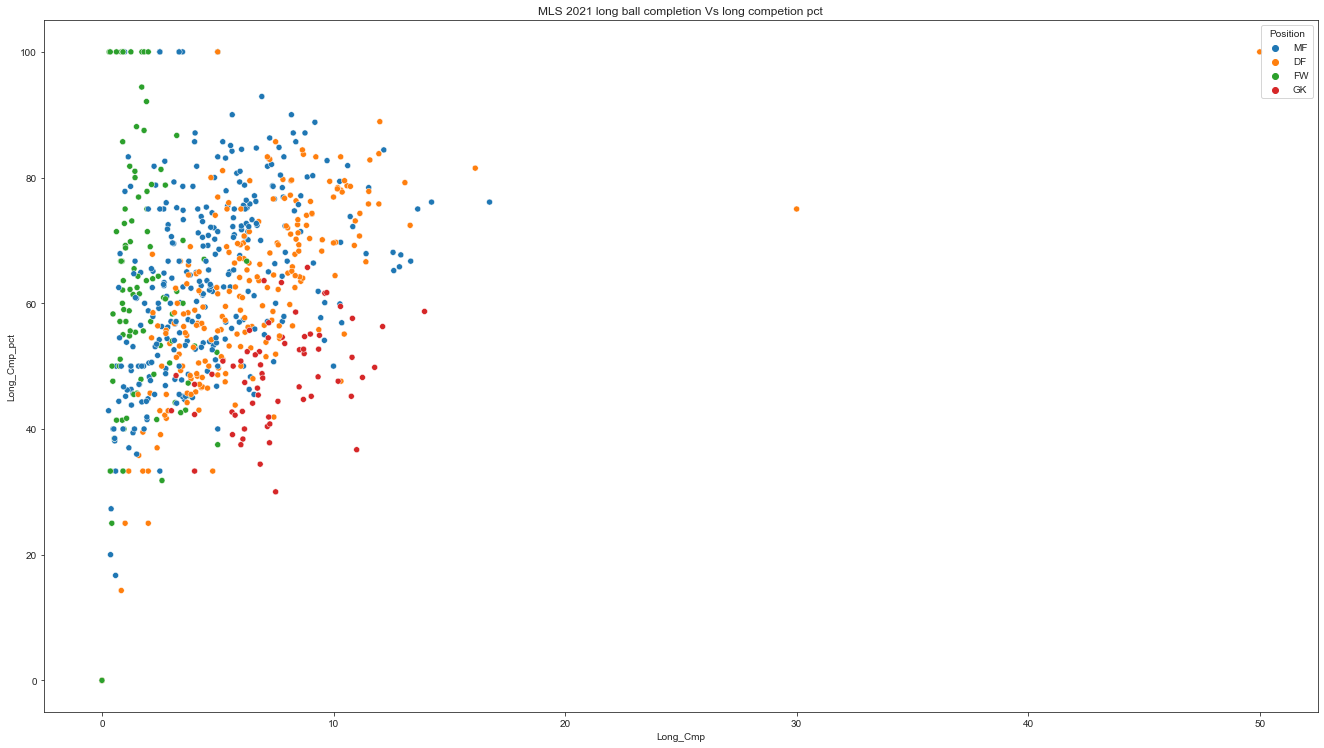

In [8]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


g = sns.scatterplot(data=df, x ='Long_Cmp', y='Long_Cmp_pct',hue='Position',
                ax=ax).set(title='MLS 2021 long ball completion Vs long competion pct')
               
# every_nth = 7
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)
plt.tight_layout()


In [10]:
max(df['Long_Cmp'])

50.0

In [16]:
df.loc[df['Long_Cmp']>15][['player_name', 'Squad_from_op',
       'Long_Att','Long_Cmp','Long_Cmp_pct', 'Nation', 'Position', 'Nineties',
       'xA', 'Key_pass']]

,player_name,Squad_from_op,Long_Att,Long_Cmp,Long_Cmp_pct,Nation,Position,Nineties,xA,Key_pass
316,Andreu Fontàs,Sporting KC,19.787879,16.121212,81.5,es ESP,DF,33.0,0.009091,0.242424
327,Ilie Sánchez,Sporting KC,22.007168,16.738351,76.1,es ESP,MF,27.9,0.010753,0.286738
605,Jason Pendant,NY Red Bulls,40.000000,30.000000,75.0,fr FRA,DF,0.1,0.000000,0.000000
609,Jordan Harvey,Los Angeles FC,50.000000,50.000000,100.0,us USA,DF,0.1,0.000000,0.000000
